<a href="https://colab.research.google.com/github/Neiswender/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/Unit_1_Sprint_1_Module_2_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [1]:
import pandas as pd

In [2]:
# Lets take a look at the Ames Iowa Housing Dataset:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [3]:
iowa = pd.read_csv(source_url)

In [4]:
# first few rows
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# shape
iowa.shape

(1460, 81)

In [6]:
# describe
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Specific Columns hold specific kinds of data

In [7]:
# column types
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', 100)

In [8]:
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [9]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
iowa[['BedroomAbvGr','Fireplaces']].sample(3)

,BedroomAbvGr,Fireplaces
97,3,0
1162,3,1
1248,3,1


# another way to call columns: dot method


In [10]:
iowa['Fireplaces'].head(3)

0    0
1    1
2    1
Name: Fireplaces, dtype: int64

In [11]:
iowa.Fireplaces.head(3)

0    0
1    1
2    1
Name: Fireplaces, dtype: int64

In [12]:
iowa['LotFrontage'].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

Some columns hold float values like the `LotFrontage` column.

In [13]:
# Look at the first ten rows of the `BedroomAbvGr` column.
iowa['BedroomAbvGr'].value_counts().head()

3    804
2    358
4    213
1     50
5     21
Name: BedroomAbvGr, dtype: int64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [14]:
iowa['LotFrontage'].value_counts(dropna=False).head()

NaN     259
60.0    143
70.0     70
80.0     69
50.0     57
Name: LotFrontage, dtype: int64

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [15]:
# NaN is the most common value in this column. What is a NaN
import numpy as np

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [16]:
# What is the datatype of NaN?
print(np.nan)
print(type(np.nan))

nan
<class 'float'>


The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

In [17]:
# how much missing data
iowa['LotFrontage'].isnull().sum()

259

In [18]:
print(iowa['LotFrontage'].median())
iowa['LotFrontage'].mean()

69.0


70.04995836802665

In [19]:
iowa['LotFrontage2']=iowa['LotFrontage'].copy()
iowa['LotFrontage2'].fillna(iowa['LotFrontage'].median(), inplace=True)

In [20]:
# drop missing data


In [21]:
print(iowa.shape)
iowa['LotFrontage'].dropna(inplace=True)
print(iowa.shape)

(1460, 82)
(1460, 82)


In [22]:
# now how much missing data?
iowa['LotFrontage'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotFrontage, Length: 1201, dtype: bool

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [23]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small_iowa=iowa[['TotalBsmtSF', '1stFlrSF','2ndFlrSF','SalePrice']].copy()
small_iowa.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
483,1216,1216,0,164000
320,1249,1249,1347,342643
151,1710,1710,0,372402
1291,630,630,672,119500
740,264,768,664,132000


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [24]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
small_iowa['TotalSF']=small_iowa['TotalBsmtSF']+small_iowa['1stFlrSF']+small_iowa['2ndFlrSF']
small_iowa.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
708,728,728,728,179540,2184
1176,876,923,0,119500,1799
248,840,840,828,180000,2508


In [25]:
# Using bracket syntax to make a new 'TotalSquareFootage' column


In [26]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small_iowa['PricePerSqft']=small_iowa['SalePrice']/small_iowa['TotalSF']
small_iowa.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSqft
981,1225,1276,1336,336000,3837,87.568413
1001,691,691,0,86000,1382,62.228654
673,1477,1839,0,257500,3316,77.653800


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



In [27]:
# what are some categorical columns?
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [28]:
# values of sale condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [29]:
# create a new categorical variable
iowa['newLotShape']=iowa['LotShape'].map({'Reg':'Regular', 'IR1':'Irregular','IR2':'Irregular','IR3':'Irregular'})
iowa['newLotShape'].value_counts()

Regular      925
Irregular    535
Name: newLotShape, dtype: int64

In [30]:
# value counts of a categorical variable
iowa['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [31]:
# Map this from four down to 3 values
iowa['newSaleCondition']=np.where(iowa['SaleCondition']=='Normal','normal','not normal')
iowa['newSaleCondition'].value_counts()

normal        1198
not normal     262
Name: newSaleCondition, dtype: int64

In [32]:
# values


In [33]:
# one more way to map categorical variables
iowa['newSaleCondition2']='ordinary'
iowa.loc[iowa['SaleCondition']=='Partial','newSaleCondition2'] = 'ugly'
iowa.loc[iowa['SaleCondition']=='Abnorml','newSaleCondition2'] = 'ugly'
iowa.loc[iowa['SaleCondition']=='Family','newSaleCondition2'] = 'pretty'
iowa.loc[iowa['SaleCondition']=='Alloca','newSaleCondition2'] = 'pretty'

In [34]:
# replace using .loc 
iowa['newSaleCondition2'].value_counts()

ordinary    1202
ugly         226
pretty        32
Name: newSaleCondition2, dtype: int64

In [35]:
# crosstab!
pd.crosstab(iowa['Alley'], iowa['newSaleCondition2'])

newSaleCondition2,ordinary,pretty,ugly
Alley,,,
Grvl,43,3,4
Pave,28,0,13


In [36]:
# margins
pd.crosstab(iowa['Alley'], iowa['newSaleCondition2'], margins=True)

newSaleCondition2,ordinary,pretty,ugly,All
Alley,,,,
Grvl,43,3,4,50
Pave,28,0,13,41
All,71,3,17,91


In [37]:
# as proportions
pd.crosstab(iowa['Alley'], iowa['newSaleCondition2'], normalize='index')

newSaleCondition2,ordinary,pretty,ugly
Alley,,,
Grvl,0.860000,0.06,0.080000
Pave,0.682927,0.00,0.317073


In [38]:
# by columns
pd.crosstab(iowa['Alley'], iowa['newSaleCondition2'], normalize='columns')

newSaleCondition2,ordinary,pretty,ugly
Alley,,,
Grvl,0.605634,1.0,0.235294
Pave,0.394366,0.0,0.764706


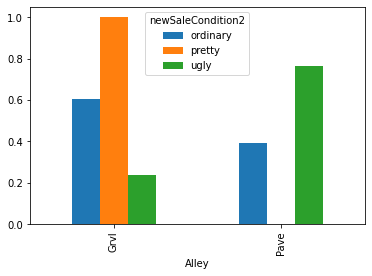

In [39]:
#display as a bar chart
myresults=pd.crosstab(iowa['Alley'],iowa['newSaleCondition2'],normalize='columns')
myresults.plot(kind='bar');

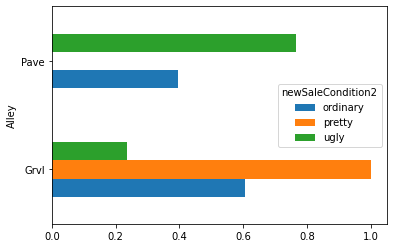

In [40]:
# Flip that
myresults.plot(kind='barh');

## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [41]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-09-05 17:05:19--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.244.115.45, 35.161.89.82, 54.148.13.215
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.244.115.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [             <=>    ]  22.28M  5.83MB/s    in 4.3s    

2020-09-05 17:05:24 (5.20 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23360898]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [42]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [43]:
# Read in the CSV
loans=pd.read_csv('LoanStats_2018Q4.csv.zip')
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title       emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose     title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       27975     27975       27975            36 months  14.47%  962.52      C     C2        Conductor       10+ years  MORTGAGE       180000     Not Verified        Dec-2018 Fully Paid  n          NaN NaN  credit_card Credit card refinancing 117xx    NY         11.47 0           Jul-1995         0              39                     NaN                    10       0       29711     66.8%      19        w                   0.00      0.00          31804.5298492634 31804.53        27975.00        3829.53       0.0                0.0        0.0                     Jan-2020     20288.02        NaN          Mar-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            206072      0           1           0           1           17                 15676        63      0           1           10861      65       44500            1      4           2            2                    20607       7416           74.9    0                        0           17                 281                  20                    17             5        20                   39                       1                     39                             0                     5              7               5           6         1         8             13            7                   10       0                0            0                  0                  78.9           60               0             

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [44]:
# We can fix the header problem by using the 'skiprows' parameter
loans=pd.read_csv('LoanStats_2018Q4.csv.zip',skiprows=(1))
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,27975.0,27975.0,27975.0,36 months,14.47%,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,11.47,0.0,Jul-1995,0.0,39.0,NaN,10.0,0.0,29711.0,66.8%,19.0,w,0.00,0.00,31804.529849,31804.53,...,60.0,0.0,0.0,286525.0,45387.0,29500.0,25025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,60 months,12.98%,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,660xx,KS,14.90,0.0,May-2007,0.0,NaN,112.0,7.0,1.0,10677.0,54.2%,12.0,w,7352.95,7352.95,4487.310000,4487.31,...,33.3,1.0,0.0,36200.0,27595.0,13000.0,16500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000.0,28000.0,28000.0,60 months,13.56%,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,760xx,TX,27.35,1.0,Jul-1987,0.0,24.0,NaN,16.0,0.0,55206.0,75%,31.0,w,20667.91,20667.91,12871.360000,12871.36,...,100.0,0.0,0.0,542027.0,128345.0,55000.0,60331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,16000.0,16000.0,16000.0,60 months,13.56%,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,787xx,TX,11.09,1.0,Oct-1997,1.0,11.0,NaN,9.0,0.0,18946.0,32.1%,21.0,w,11503.84,11503.84,7570.880000,7570.88,...,20.0,0.0,0.0,138125.0,128218.0,57600.0,79125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7500.0,7500.0,7500.0,36 months,10.72%,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,600xx,IL,3.86,0.0,May-2005,1.0,NaN,114.0,9.0,1.0,2200.0,12.6%,17.0,w,0.00,0.00,2829.930000,2829.93,...,0.0,1.0,0.0,403892.0,20833.0,17400.0,16812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [45]:
# Sum null values by column and sort from least to greatest


In [46]:
# Address the extra NaNs in each column by skipping the footer as well.
loans=pd.read_csv('LoanStats_2018Q4.csv.zip',skiprows=1, skipfooter=2)
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,27975,27975,27975.0,36 months,14.47%,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,...,60.0,0,0,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,12.98%,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,...,33.3,1,0,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000,28000,28000.0,60 months,13.56%,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,...,100.0,0,0,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,16000,16000,16000.0,60 months,13.56%,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,...,20.0,0,0,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7500,7500,7500.0,36 months,10.72%,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,...,0.0,1,0,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,4427.45,4427.45,7620.38,7620.38,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2187.38,2187.38,3732.49,3732.49,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,4285.08,4177.96,7193.60,7013.76,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,4495.59,4495.59,7824.37,7824.37,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#skipfooter

For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

In [49]:
loans.isnull().sum()

id                       128412
member_id                128412
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        127475
settlement_date          127475
settlement_amount        127475
settlement_percentage    127475
settlement_term          127475
Length: 144, dtype: int64

In [50]:
pd.set_option('display.max_rows',200)

In [51]:
loans=loans.drop(['url','member_id','desc','id'],axis=1).copy()


In [52]:
loans.shape

(128412, 140)

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [53]:
# Look at the first 10 values of the int_rate column
loans['int_rate'].head(10)

0     14.47%
1     12.98%
2     13.56%
3     13.56%
4     10.72%
5     20.89%
6     26.31%
7     23.40%
8     19.92%
9     17.97%
Name: int_rate, dtype: object

In [54]:
# Look at a specific value from the int_rate column
loans['int_rate'][3]

' 13.56%'

In [55]:
# confirm that
type(loans['int_rate'][3])

str

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [56]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
row3=' 17.97%'

In [57]:
# remove leading space
row3.strip()

'17.97%'

In [58]:
# remove percent
row3.strip('%')

' 17.97'

In [59]:
# remove both
row3.strip('%').strip()

'17.97'

In [60]:
# "Cast" the string value to a float
float('17.97')

17.97

In [61]:
# put it all together
float(row3.strip('%').strip())

17.97

In [62]:
# check our work
type(float(row3.strip('%').strip()))

float

### Write a function to make our solution reusable!

In [63]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.
def myfunc(cell_contents):
  return float(cell_contents.strip('%').strip())

In [64]:
# Test out our function by calling it on our example
myfunc(' 17.97')
myfunc(row3)

17.97

In [65]:
# is the data type correct?
type(myfunc(row3))

float

### Apply our solution to every cell in a column

In [66]:
# for loop:
newlist=[]
for cell in loans['int_rate']:
  newlist.append(myfunc(cell))

In [67]:
# look at first 10 values of that list:
newlist[:10]

[14.47, 12.98, 13.56, 13.56, 10.72, 20.89, 26.31, 23.4, 19.92, 17.97]

In [68]:
# compare to original values
loans['int_rate'].head(10)

0     14.47%
1     12.98%
2     13.56%
3     13.56%
4     10.72%
5     20.89%
6     26.31%
7     23.40%
8     19.92%
9     17.97%
Name: int_rate, dtype: object

In [69]:
# convert that list to a new column
loans['int_rate_cleaned']=pd.Series(newlist)
loans[['int_rate','int_rate_cleaned']].sample(10)

,int_rate,int_rate_cleaned
95568,13.56%,13.56
8412,18.94%,18.94
35791,8.19%,8.19
1907,10.33%,10.33
85594,6.67%,6.67
76462,19.92%,19.92
55960,20.89%,20.89
120981,14.47%,14.47
44785,7.02%,7.02
97122,16.14%,16.14


In [70]:
# convert that list to a new column (not as list!)


In [71]:
# What type of data is held in our new column?
loans['int_rate_cleaned'].dtypes

dtype('float64')

In [72]:
# improve all of this code with the .apply function!
loans['int_rate_cleaned2']=loans['int_rate'].apply(myfunc)

In [73]:
loans[['int_rate','int_rate_cleaned','int_rate_cleaned2']].sample(10)

,int_rate,int_rate_cleaned,int_rate_cleaned2
107556,8.46%,8.46,8.46
2330,10.33%,10.33,10.33
67484,13.56%,13.56,13.56
105472,19.92%,19.92,19.92
14876,13.56%,13.56,13.56
84094,8.46%,8.46,8.46
872,13.56%,13.56,13.56
76500,22.35%,22.35,22.35
12208,10.33%,10.33,10.33
1734,16.91%,16.91,16.91


## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [74]:
# look at the top 20 rows
loans.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_cleaned2
0,27975,27975,27975.0,36 months,14.47%,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,0.00,...,0,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47
1,10000,10000,10000.0,60 months,12.98%,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,0.00,...,0,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98
2,28000,28000,28000.0,60 months,13.56%,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,0.00,...,0,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,13.56,13.56
3,16000,16000,16000.0,60 months,13.56%,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,0.00,...,0,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,13.56,13.56
4,7500,7500,7500.0,36 months,10.72%,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,880.23,...,0,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.72,10.72
5,3500,3500,3500.0,36 months,20.89%,131.67,D,D4,gas attendant,10+ years,MORTGAGE,40000.0,Source Verified,Dec-2018,Current,n,car,Car financing,078xx,NJ,9.09,0,Oct-2004,1,24.0,NaN,4,0,1944,33.5%,18,w,1955.78,1955.78,2495.640000,2495.64,1544.22,951.42,0.0,0.00,...,0,217000,26902,5000,25000,6902.0,May-2003,0.0,3.0,6.0,47.9,0.0,21.0,0.0,0.0,46.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,20.89,20.89
6,16000,16000,1

In [75]:
# Look at the top 20 employment titles
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [76]:
# How many different unique employment titles are there currently?
print(len(loans['emp_title']))
loans['emp_title'].nunique()

128412


43892

In [77]:
# another way to do this
loans['emp_title'].unique()[:10]

array(['Conductor ', 'Printer', 'Project Manager', 'LMSW',
       'Program Manager', 'gas attendant',
       'Financial Relationship Associate', 'Sale Representative',
       'Material Handler', 'Administrative'], dtype=object)

In [78]:
# How often is the employment_title null?
loans['emp_title'].isnull().sum()

20947

What are some possible reasons as to why a person's employment title may have not been provided?

In [79]:
# Create some examples that represent the cases that we want to clean up
examples=['owner','Supervisor',' Project Manager',np.nan]

In [80]:
def clean_title(anytitle):
  if isinstance(anytitle,str):
    return anytitle.title().strip()
  else:
    return "Unknown"

In [81]:
# do that same function in individual steps
clean_title(' Project manager')

'Project Manager'

In [82]:
# create a for loop:
newlist=[]
for title in examples:
  newlist.append(clean_title(title))

newlist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [84]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(title) for title in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [85]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
loans['emp_title2']=loans['emp_title'].apply(clean_title)
loans[['emp_title2','emp_title']].sample(4)


,emp_title2,emp_title
46460,Program Coordinator,Program Coordinator
79733,Rn,RN
49662,Unknown,NaN
57655,Property Manager,Property Manager


In [ ]:
# check our work

We can use the same code as we did earlier to see how much progress was made.


In [87]:
# Look at the top 20 employment titles
loans['emp_title'].value_counts(ascending=False)[:20]

Teacher                     2090
Manager                     1773
Registered Nurse             952
Driver                       924
RN                           726
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Truck Driver                 387
Operations Manager           387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Name: emp_title, dtype: int64

In [88]:
# How many different unique employment titles are there currently?
len(loans['emp_title'].value_counts())

43892

In [89]:
# How often is the employment_title null (NaN)?
loans['emp_title'].isnull().sum()


20947

## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [92]:
[col for col in loans if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [103]:
loans['issue_d'][:10]

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
5   2018-12-01
6   2018-12-01
7   2018-12-01
8   2018-12-01
9   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [95]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)
loans.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [96]:
# list all columns
pd.set_option('display.max_rows',200)
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_cleaned',
       'int_rate_cleaned2', 'emp_title2'],
      dtype='object', length=143)

In [98]:
loans['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [108]:
print(loans['issue_d'].value_counts())
print('--------------------------')
print(loans['issue_d'].head().values)

2018-10-01    46305
2018-11-01    41973
2018-12-01    40134
Name: issue_d, dtype: int64
--------------------------
['2018-12-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000']


In [109]:
# as a for loop:
mylist=[]
for col in loans.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [110]:
# as a list comprehension:
datecols=[col for col in loans.columns if col.endswith('_d')]
datecols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Lets look at the string format of the `issue_d` column

In [111]:
# dtype
loans['issue_d'].dtypes

dtype('<M8[ns]')

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [112]:
# infer_datetime_format=True
loans['issue_date']=pd.to_datetime(loans['issue_d'],infer_datetime_format=True)

In [113]:
# check our work
loans[['issue_d','issue_date']].sample(4)

,issue_d,issue_date
28513,2018-12-01,2018-12-01
46301,2018-11-01,2018-11-01
93996,2018-10-01,2018-10-01
124194,2018-10-01,2018-10-01


Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [114]:
loans['issue_date'].dtypes

dtype('<M8[ns]')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [115]:
loans['issue_date'][0]

Timestamp('2018-12-01 00:00:00')

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [118]:
loans['issue_date'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_date, Length: 128412, dtype: int64

Now the month.

In [120]:
loans['issue_date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_date, Length: 128412, dtype: int64

In [121]:
loans['year']=loans['issue_date'].dt.year
loans[['issue_date','year']].sample(4)

,issue_date,year
113302,2018-10-01,2018
78727,2018-11-01,2018
40785,2018-11-01,2018
13356,2018-12-01,2018


In [122]:
loans['month']=loans['issue_date'].dt.month
loans[['issue_date','year','month']].sample(4)

,issue_date,year,month
117061,2018-10-01,2018,10
49006,2018-11-01,2018,11
115645,2018-10-01,2018,10
11733,2018-12-01,2018,12


In [123]:
# look at their types!
loans[['issue_date','year','month']].dtypes

issue_date    datetime64[ns]
year                   int64
month                  int64
dtype: object

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [124]:
# same thing, diff var
loans['weekday']=loans['issue_date'].dt.weekday
loans[['issue_date','year','month','weekday']].sample(4)

,issue_date,year,month,weekday
92399,2018-10-01,2018,10,0
59206,2018-11-01,2018,11,3
10720,2018-12-01,2018,12,5
113491,2018-10-01,2018,10,0


Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [125]:
# date arithmetic
loans['pull_date']=pd.to_datetime(loans['last_credit_pull_d'],infer_datetime_format=True)
loans[['pull_date','last_credit_pull_d']].sample(2)

,pull_date,last_credit_pull_d
3345,2020-08-01,Aug-2020
21518,2020-08-01,Aug-2020


In [127]:
# check that out
loans['day_diff']=(loans['pull_date']-loans['issue_date']).dt.days

In [128]:
loans[['pull_date','issue_date','day_diff']].sample(5)

,pull_date,issue_date,day_diff
41408,2020-05-01,2018-11-01,547.0
55289,2020-08-01,2018-11-01,639.0
31942,2020-02-01,2018-12-01,427.0
20392,2020-08-01,2018-12-01,609.0
73591,2020-08-01,2018-11-01,639.0


What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [130]:
loans['earliest_cr_line'].head()

0    Jul-1995
1    May-2007
2    Jul-1987
3    Oct-1997
4    May-2005
Name: earliest_cr_line, dtype: object

In [134]:
loans['earliest_cr_line']=pd.to_datetime(loans['earliest_cr_line'], infer_datetime_format=True)

loans['earliest_cr_line'].head()

0   1995-07-01
1   2007-05-01
2   1987-07-01
3   1997-10-01
4   2005-05-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [135]:
loans['days_from_earliest_credit_to_issue']=(loans['issue_d']-loans['earliest_cr_line']).dt.days

What's oldest credit history that was involved in Q4 2018? 

In [137]:
loans['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [ ]:
#25,171 days old!

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.